## PyTorch DQN (faster)

In [2]:
from dqn import QNetwork
from better_dqn_agent import DQNAgent
from agent_trainer import Trainer
from memory_buffer import MemoryBuffer
import gym

import matplotlib.pyplot as plt

import torch
torch.manual_seed(0)

env = gym.make('CartPole-v0')
env.seed(0)

[0]

In [3]:
env = gym.make('CartPole-v0')
env.seed(0)

dqn_agent = DQNAgent(learning_rate=0.01, 
                     discount_rate=0.9,
                     num_inputs=4,
                     num_neurons=32,
                     num_outputs=2
                    )

trainer = Trainer(
    env=env, 
    agent=dqn_agent, 
    memory_buffer=MemoryBuffer(buffer_length=50000), 
    start_epsilon=1, 
    timestep_to_start_learning=1000,
    batch_size=32,
    target_update_steps=1000,
    epsilon_decay_rate=0.99
)

Trainer initialised.


In [4]:
trainer.run(num_episodes=500)

Target network updated. 
Episode 0 finished after 20 timesteps. 100 ep running avg 19.0. Epsilon 1.00. Buffer length: 20. Zero actions: 0.40
Episode 10 finished after 16 timesteps. 100 ep running avg 20.0. Epsilon 0.90. Buffer length: 232. Zero actions: 0.69
Episode 20 finished after 38 timesteps. 100 ep running avg 18.0. Epsilon 0.82. Buffer length: 402. Zero actions: 0.53
Episode 30 finished after 16 timesteps. 100 ep running avg 18.0. Epsilon 0.74. Buffer length: 589. Zero actions: 0.69
Episode 40 finished after 14 timesteps. 100 ep running avg 16.0. Epsilon 0.67. Buffer length: 735. Zero actions: 0.71
Episode 50 finished after 19 timesteps. 100 ep running avg 16.0. Epsilon 0.61. Buffer length: 889. Zero actions: 0.58
Target network updated. 
Episode 60 finished after 16 timesteps. 100 ep running avg 15.0. Epsilon 0.55. Buffer length: 1009. Zero actions: 0.69
Episode 70 finished after 23 timesteps. 100 ep running avg 16.0. Epsilon 0.49. Buffer length: 1267. Zero actions: 0.52
Episod

In [9]:
%prun trainer.run(num_episodes=50)

Episode 0 finished after 53 timesteps. 100 ep running avg 186.0. Epsilon 0.010860193639877886.
Episode 10 finished after 200 timesteps. 100 ep running avg 186.0. Epsilon 0.01.
Episode 20 finished after 200 timesteps. 100 ep running avg 187.0. Epsilon 0.01.
Episode 30 finished after 200 timesteps. 100 ep running avg 186.0. Epsilon 0.01.
Episode 40 finished after 200 timesteps. 100 ep running avg 187.0. Epsilon 0.01.
 

In [10]:
%load_ext line_profiler

In [11]:
%lprun -f DQNAgent.fit_batch trainer.run(num_episodes=50)

Episode 0 finished after 142 timesteps. 100 ep running avg 185.0. Epsilon 0.01.
Episode 10 finished after 163 timesteps. 100 ep running avg 182.0. Epsilon 0.01.
Episode 20 finished after 200 timesteps. 100 ep running avg 173.0. Epsilon 0.01.
Episode 30 finished after 113 timesteps. 100 ep running avg 165.0. Epsilon 0.01.
Episode 40 finished after 127 timesteps. 100 ep running avg 158.0. Epsilon 0.01.


In [19]:
%time trainer.run(num_episodes=500)

Episode 0 finished after 18 timesteps. 100 ep running avg 17.0. Epsilon 1.
Episode 10 finished after 15 timesteps. 100 ep running avg 18.0. Epsilon 0.9043820750088043.
Episode 20 finished after 15 timesteps. 100 ep running avg 16.0. Epsilon 0.8179069375972307.
Episode 30 finished after 16 timesteps. 100 ep running avg 15.0. Epsilon 0.7397003733882802.
Episode 40 finished after 14 timesteps. 100 ep running avg 14.0. Epsilon 0.6689717585696803.
Episode 50 finished after 14 timesteps. 100 ep running avg 14.0. Epsilon 0.6050060671375365.
Episode 60 finished after 10 timesteps. 100 ep running avg 14.0. Epsilon 0.5471566423907612.
Episode 70 finished after 10 timesteps. 100 ep running avg 13.0. Epsilon 0.49483865960020695.
Episode 80 finished after 20 timesteps. 100 ep running avg 13.0. Epsilon 0.44752321376381066.
Episode 90 finished after 13 timesteps. 100 ep running avg 13.0. Epsilon 0.4047319726783239.
Episode 100 finished after 16 timesteps. 100 ep running avg 13.0. Epsilon 0.3660323412

(0, 500)

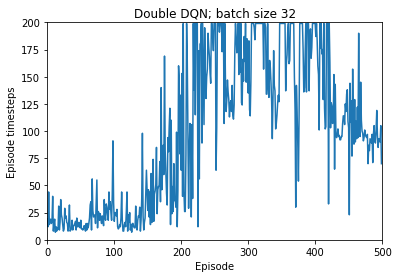

In [5]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(trainer.episode_lengths,label='episode length')
ax.set_xlabel('Episode')
ax.set_ylabel('Episode timesteps')
ax.set_title(f'Double DQN; batch size {trainer.batch_size}')
ax.set_ylim(0, trainer.max_num_steps)
ax.set_xlim(0, len(trainer.episode_lengths))

In [12]:
%prun trainer.run(30)

Episode 0 finished after 63 timesteps. 100 ep running avg 16.0. Epsilon 0.20027702685748935.
Episode 10 finished after 11 timesteps. 100 ep running avg 15.0. Epsilon 0.18112695312597027.
Episode 20 finished after 9 timesteps. 100 ep running avg 15.0. Epsilon 0.16380796970808745.
 